In [2]:
import pandas as pd
import matplotlib as plt

# Uniform Distribution
So we will import a birthday dataset from Kaggle, basically the number of birthdays on each day should be same and following a uniform distribution

In [21]:
import kagglehub
path = kagglehub.dataset_download("ayessa/birthday")
bday = pd.read_csv(path+"/US_births_2000-2014_SSA.csv")
bday

,year,month,date_of_month,day_of_week,births,date
0,2000.0,1.0,1.0,6.0,9083.0,1/1/2000
1,2000.0,1.0,2.0,7.0,8006.0,1/2/2000
2,2000.0,1.0,3.0,1.0,11363.0,1/3/2000
3,2000.0,1.0,4.0,2.0,13032.0,1/4/2000
4,2000.0,1.0,5.0,3.0,12558.0,1/5/2000
...,...,...,...,...,...,...
9525,NaN,NaN,NaN,NaN,NaN,NaN
9526,NaN,NaN,NaN,NaN,NaN,NaN
9527,NaN,NaN,NaN,NaN,NaN,NaN
9528,NaN,NaN,NaN,NaN,NaN,NaN


We have loaded the csv into dataframe, now we will analyse the data

In [25]:
bday.describe()

,year,month,date_of_month,day_of_week,births
count,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000
mean,2006.999270,6.522723,15.730243,3.999817,11350.068261
std,4.321085,3.449075,8.801151,2.000502,2325.821049
min,2000.000000,1.000000,1.000000,1.000000,5728.000000
25%,2003.000000,4.000000,8.000000,2.000000,8740.000000
50%,2007.000000,7.000000,16.000000,4.000000,12343.000000
75%,2011.000000,10.000000,23.000000,6.000000,13082.000000
max,2014.000000,12.000000,31.000000,7.000000,16081.000000


In [31]:
are_all_null = bday.iloc[5479:].isnull().all().all()

if are_all_null:
    print("All values after row 5479 are null.")
else:
    print("Not all values after row 5479 are null.")

All values after row 5479 are null.


In [34]:
bday = bday.iloc[:5479].copy()
display(bday.tail())

,year,month,date_of_month,day_of_week,births,date
5474,2014.0,12.0,27.0,6.0,8656.0,12/27/2014
5475,2014.0,12.0,28.0,7.0,7724.0,12/28/2014
5476,2014.0,12.0,29.0,1.0,12811.0,12/29/2014
5477,2014.0,12.0,30.0,2.0,13634.0,12/30/2014
5478,2014.0,12.0,31.0,3.0,11990.0,12/31/2014


In [36]:
bday.describe()

,year,month,date_of_month,day_of_week,births
count,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000
mean,2006.999270,6.522723,15.730243,3.999817,11350.068261
std,4.321085,3.449075,8.801151,2.000502,2325.821049
min,2000.000000,1.000000,1.000000,1.000000,5728.000000
25%,2003.000000,4.000000,8.000000,2.000000,8740.000000
50%,2007.000000,7.000000,16.000000,4.000000,12343.000000
75%,2011.000000,10.000000,23.000000,6.000000,13082.000000
max,2014.000000,12.000000,31.000000,7.000000,16081.000000


In [39]:
#grouping by total bdays by their month
monthly_births = bday.groupby('month')['births'].sum()
bday['total_monthly_births'] = bday['month'].map(monthly_births)
display(bday.head())

,year,month,date_of_month,day_of_week,births,date,total_monthly_births
0,2000.0,1.0,1.0,6.0,9083.0,1/1/2000,5072588.0
1,2000.0,1.0,2.0,7.0,8006.0,1/2/2000,5072588.0
2,2000.0,1.0,3.0,1.0,11363.0,1/3/2000,5072588.0
3,2000.0,1.0,4.0,2.0,13032.0,1/4/2000,5072588.0
4,2000.0,1.0,5.0,3.0,12558.0,1/5/2000,5072588.0


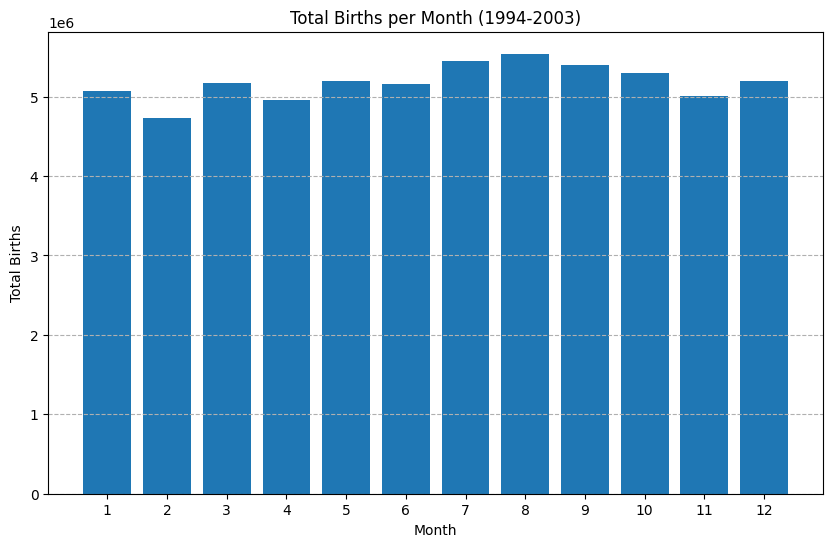

In [45]:
# Create a bar chart of total monthly births vs their month
monthly_births_sorted = monthly_births.sort_index()
plt.figure(figsize=(10, 6))
plt.bar(monthly_births_sorted.index, monthly_births_sorted.values)
plt.xlabel('Month')
plt.ylabel('Total Births')
plt.title('Total Births per Month (1994-2003)')
plt.xticks(monthly_births_sorted.index)
plt.grid(axis='y', linestyle='--')
plt.show()

Clearly we can see that it follows a discrete uniform distribution, but still we have some variations in the bdays from February to August

The **most popular month for weddings in the US is October**, consistently ranking as the busiest month with around 17% of weddings. September is the second most popular month

Considering an average pregnancy takes 9 months, most births should be in June, there might be a buffer of 2-3 months, which ultimately explains why most amount of births happen from July to September

# Generating a Uniform Continuous Distribution also-
each day birth frequency plotted

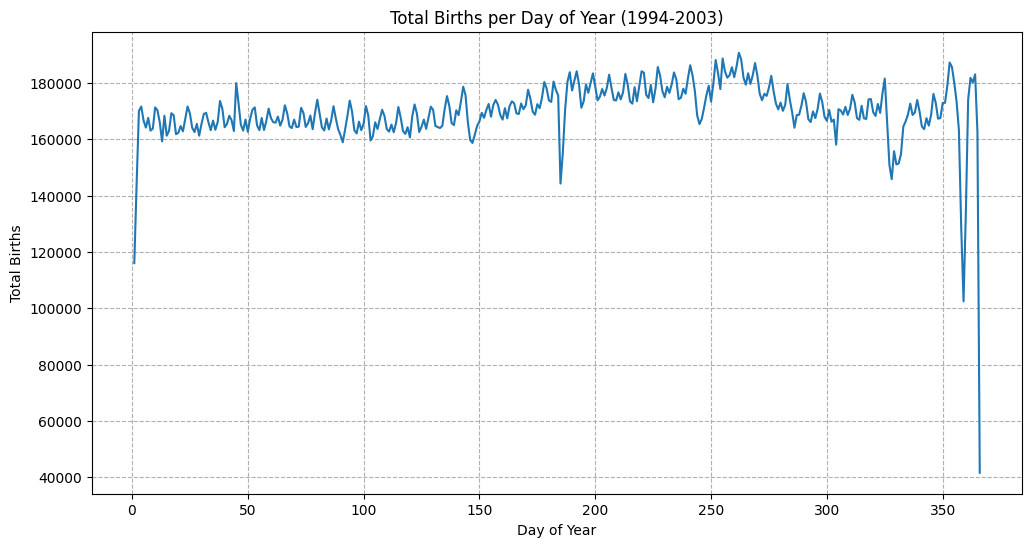

In [46]:
bday['date'] = pd.to_datetime(bday['date'], format='%m/%d/%Y')
bday['day_of_year'] = bday['date'].dt.dayofyear
daily_births = bday.groupby('day_of_year')['births'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_births.index, daily_births.values)
plt.xlabel('Day of Year')
plt.ylabel('Total Births')
plt.title('Total Births per Day of Year (1994-2003)')
plt.grid(True, linestyle='--')
plt.show()